# K-Means Clustering Wine

K-Means clustering is a popular unsupervised machine learning algorithm used to partition a dataset into a specified number of clusters. The algorithm aims to group data points that are similar to each other while being dissimilar to points in other clusters: 
1. Choose $K$ initial cluster centroids (center points) from the dataset or randomly. 
2. For each data point $x_i, i\in [1,n]$, calculate the distance to each centroid. Assign $x_i$ to the cluster whose centroid is closest (usually using Euclidean distance). I.e., $c^{(i)} = \argmin_k || x^{(i)} - \mu_k ||$, where $c^{(i)}$ is the index of the cluster assigned to $x^{(i)}$ and $\mu_k$ is the centroid of cluster $k$.
3. Update the centroids of each cluster to be the mean of all data points assigned to that cluster. I.e., $\mu_k = \frac{1}{|S_k|}\sum_{i\in S_k}x^{(i)}$, where $S_k$ is the set of data points assigned to cluster $k$. 
4. Repeat steps 2 and 3 until convergence. Convergence occurs when the assignments of data points to clusters no longer change significantly or after a fixed number of iterations.

In this project, we use the Wine dataset from scikit-learn, preprocess the data using standard scaling, apply K-Means clustering with a specified number of clusters, and visualize the clusters using PCA for dimensionality reduction. The num_clusters variable allows you to adjust the number of clusters to fit your needs.

## Imports

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## Wine Dataset

Load the Wine dataset

In [41]:
wine = load_wine()
data = wine.data
target_names = wine.target_names
feature_names = wine.feature_names

Plot the dataset

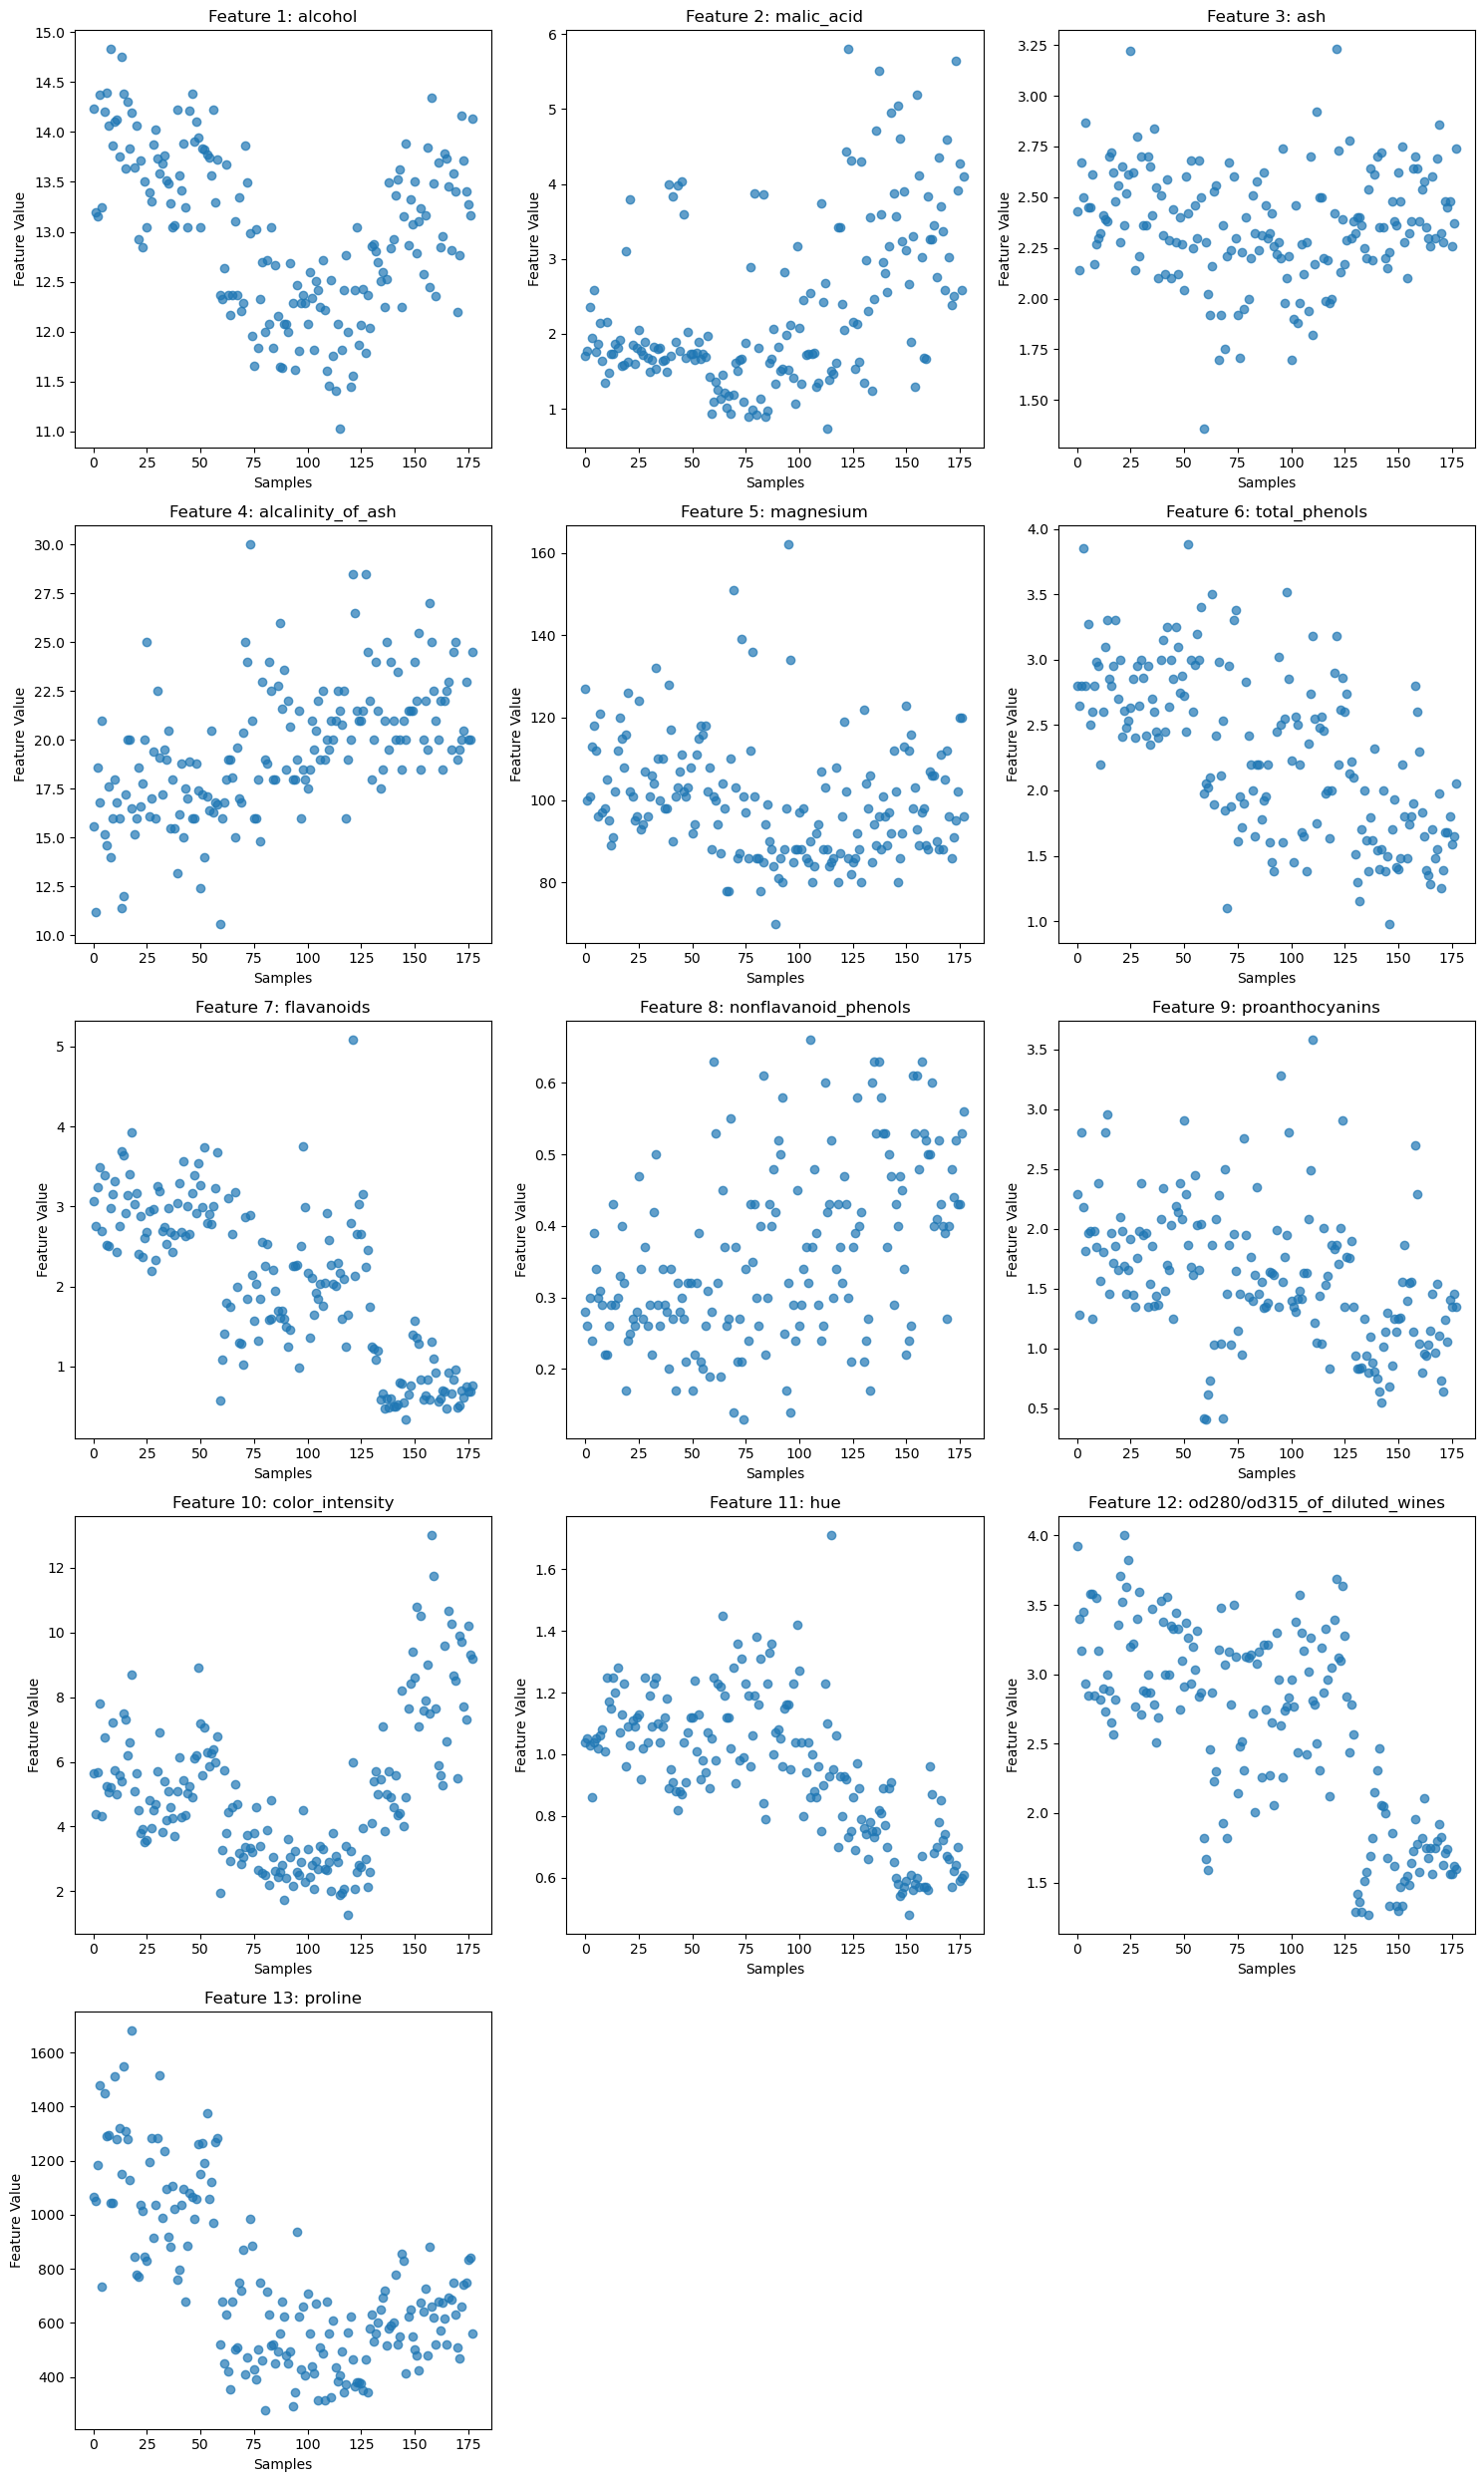

In [42]:
num_features = data.shape[1]
num_rows = (num_features + 2) // 3
plt.figure(figsize=(15, 5 * num_rows))
for feature_idx in range(num_features):
    plt.subplot(num_rows, 3, feature_idx + 1)
    plt.scatter(range(data.shape[0]), data[:, feature_idx], alpha=0.7)
    plt.xlabel('Samples')
    plt.ylabel('Feature Value')
    plt.title(f'Feature {feature_idx + 1}: {feature_names[feature_idx]}')  # Add feature name to title

plt.tight_layout()
plt.show()

Preprocess the data

In [43]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

The elbow method is a technique to determine the optimal number of clusters by plotting the sum of squared distances (inertia) against the number of clusters.
First, calculate sum of squared distances (inertia) for different numbers of clusters.

In [44]:
inertia_values = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

Then, plot the elbow curve.

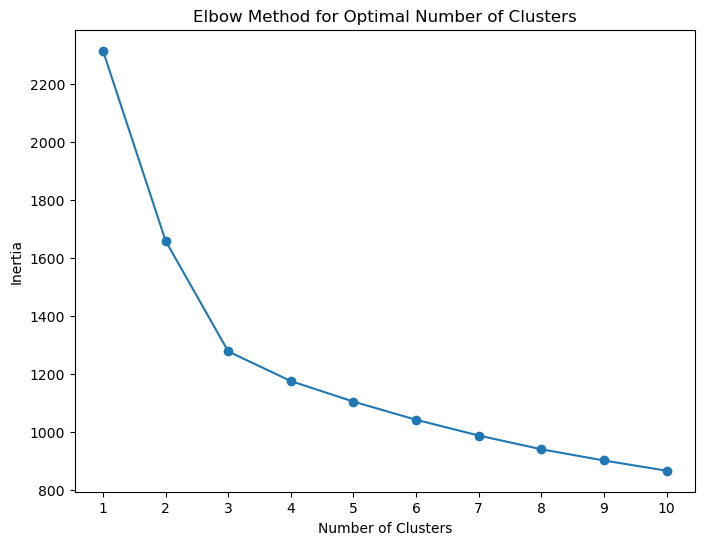

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 11))
plt.show()

## K-Means Clustering

Apply the K-Means clustering algorithm to the preprocessed wine dataset. Group similar wine samples into three clusters and assigns a cluster label to each wine sample based on its attributes.

In [46]:
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

The silhouette score measures the quality of the clusters based on the distance between points within the same cluster and the distance between points in different clusters. Higher silhouette scores indicate better-defined clusters.

In [47]:
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.2849


In order to effectively visualize the data we reduce the dimensionality of the Wine dataset to two dimensions using PCA. 

In [48]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

Finally, we plot the clusters

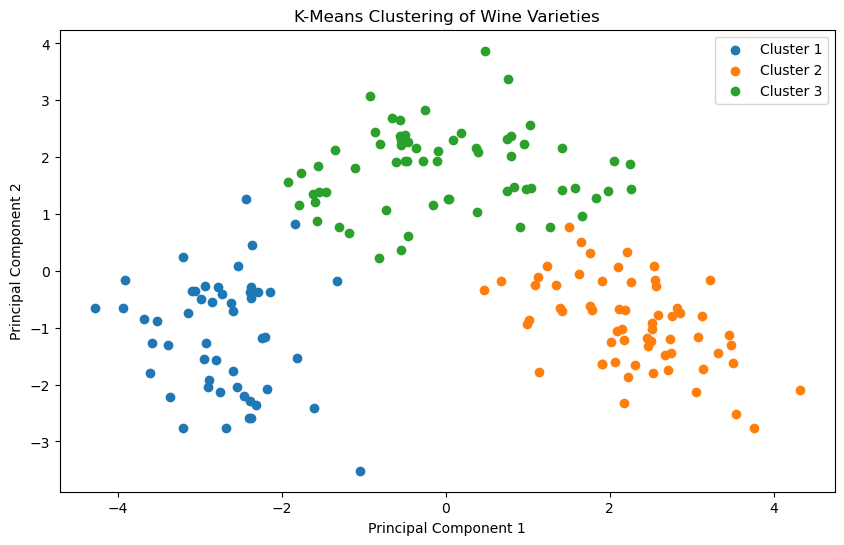

In [49]:
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(data_pca[cluster_labels == i, 0], data_pca[cluster_labels == i, 1], label=f'Cluster {i + 1}')

plt.title('K-Means Clustering of Wine Varieties')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Create a DataFrame with data and cluster labels and calculate mean values of features within each cluster.

In [52]:
data_with_clusters = pd.DataFrame(data_scaled, columns=feature_names)
data_with_clusters['Cluster'] = cluster_labels
cluster_means = data_with_clusters.groupby('Cluster').mean()

Display the cluster means in a side-by-side table

In [53]:
cluster_means_transposed = cluster_means.transpose()
print(cluster_means_transposed)

Cluster                              0         1         2
alcohol                       0.164907  0.835232 -0.926072
malic_acid                    0.871547 -0.303810 -0.394042
ash                           0.186898  0.364706 -0.494517
alcalinity_of_ash             0.524367 -0.610191  0.170602
magnesium                    -0.075473  0.577587 -0.491712
total_phenols                -0.979330  0.885237 -0.075983
flavanoids                   -1.215248  0.977820  0.020813
nonflavanoid_phenols          0.726064 -0.562090 -0.033534
proanthocyanins              -0.779706  0.580287  0.058266
color_intensity               0.941539  0.171063 -0.901914
hue                          -1.164789  0.473984  0.461804
od280/od315_of_diluted_wines -1.292412  0.779247  0.270764
proline                      -0.407088  1.125185 -0.753846
